### ランダム化実験
#### 選択性バイアス
授業の出席率と成績に相関が観察されたとして、その結果を因果関係とみなせるか。
ある学生$i$について$Y_i$を最終試験の点数を表す変数、$T_i$を学生$i$の出席率が50%以上ならば1の値を、50%未満ならば0の値をとるダミー変数とおく。
この授業の受講者数$n$は40人とし、データとして$\{(Y_i,T_i):i=1,\cdots,40\}$が得られたとする。

In [17]:
import pandas as pd

data = pd.read_csv('C:/Users/tanak/study/参考書/Rによる実証分析/R_EmpiricalAnalysis/02 演習用データ集/Ch8.data.csv')
data.head()

,Y,T,motiv
0,65,0,10.620347
1,64,0,14.884956
2,76,1,22.914135
3,83,1,36.328312
4,54,0,8.067277


(-1.0, 2.0)

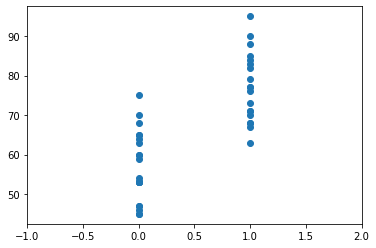

In [6]:
import matplotlib.pyplot as plt

plt.plot(data['T'], data['Y'], 'o')
plt.xlim(-1,2)

In [16]:
data.groupby('T')['Y'].agg(['count','mean','max','min'])

,count,mean,max,min
T,,,,
0,21,57.047619,75,45
1,19,77.210526,95,63


授業に出ているが学生は出ていない学生に比べ、平均的に20.16点高い成績をとっていることがわかる。
「この20.16点という平均点の差が、純粋に授業出席の多い・少ないによって生じた差なのか」が知りたいことである。
ここで疑似相関を考えると、授業の出席率と成績に同時に影響を与える要因として、まず学習意欲が挙げられる。
学習意欲が高ければ積極的に授業に出席することでどれだけ効率的に学習できるかに影響を与えるものと考えられる。
他にも出席率と生成器に影響する要因は多数存在すると考えられ、それらの影響をすべて考慮に入れない限り、回帰分析から因果関係を正確に特定することはできない。
しかし、この結果は少なくとも「学生の学習意欲や学力が、授業の出席率と成績に同時に影響を与えている」ことを示している。
出席率と成績の単純な相関関係を因果関係として解釈することは過大評価といえる。

各学生は2つのグループの伊瀬れかに属している。
- トリートメントグループ($T=1$)：授業に50%以上出席
- コントロールグループ($T=0$)：授業に50%未満出席

ある学生$i(i=1,\cdots,n)$がトリートメントグループに所属しているときの成績を$Y_{1i}$、コントロールグループに所属しているときの成績を$Y_{0i}$と書くことにする。

$$
Y_i=\left\{
\begin{array}{ll}
Y_{1i} & if\ T_i=1 \\
Y_{0i} & if\ T_i=0
\end{array}
\right.
$$

1つの式にまとめると、

$$
Y_i=T_iY_{1i}+(1-T_i)Y_{0i}
$$

と書ける。
また、学生$i$が授業に50%以上出席することの因果的効果、すなわちトリートメント効果は

$$
Y_{1i}-Y_{0i}
$$

である。
もしトリートメント効果が0の場合は、
$$
Y_{1i}=Y_{0i}
$$

だから、

$$
Y_i=Y_{1i}=Y_{0i}
$$

となる。

ただし、一般的にトリートメント効果は個人によって異なる値をとる。
また、それぞれの学生について、観測できるのは$Y_1$と$Y_0$のどちらか一方であり、個人レベルでのトリートメント効果を調べることは原理的に不可能である。
そこで、特定の個人ではなく、トリートメントグループの平均的な成績と、コントロールグループの平均的な成績の差

$$
E[Y_i|T_i=1]-E[Y_i|T_i=0]
$$

について調べる。
ここで、

$$
\begin{align}
E[Y_i|T_i=1]&=E[T_iY_{1i}+(1-T_i)Y_{0i}|T_i=1]\\
&=E[1Y_{1i}+0Y_{0i}|T_i=1]\\
&=E[Y_{1i}|T_i=1]
\end{align}
$$

同様に

$$
\begin{align}
E[Y_i|T_i=0]&=E[T_iY_{1i}+(1-T_i)Y_{0i}|T_i=0]\\
&=E[0Y_{1i}+1Y_{0i}|T_i=0]\\
&=E[Y_{0i}|T_i=0]
\end{align}
$$

であることに注意すると

$$
\begin{align}
E[Y_i|T_i=1]-E[Y_i|T_i=0]&=E[Y_{1i}|T_i=1]-E[Y_{0i}|T_i=0]\\
&=E[Y_{1i}-Y_{0i}|T_i=1]+E[Y_{0i}|T_i=1]-E[Y_{0i}|T_i=0]
\end{align}
$$

右辺第1項は「出席率が50%以上の学生に対する、授業出席が成績にもたらす平均的なトリートメント効果」と解釈できる。
このような「トリートメントグループに対する平均トリートメント効果」を、**ATET(またはATT)**と呼ぶ。

特に、トリートメント効果がトリートメントグループとコントロールグループで平均的に等しい場合、

$$
E[Y_{1i}-Y_{0i}|T_i=1]=E[Y_{1i}-Y_{0i}|T_i=0]
$$

ならば、

$$
\begin{align}
E[Y_{1i}-Y_{0i}]&=E[Y_{1i}-Y_{0i}|T_i=1]P(T_i=1)+E[Y_{1i}-Y_{0i}|T_i=0]P(T_i=0)\\
&=E[Y_{1i}-Y_{0i}|T_i=1]\{P(T_i=1)+P(T_i=0) \}\\
&=E[Y_{1i}-Y_{0i}|T_i=1]
\end{align}
$$

となり、ATETは平均トリートメント効果(ATE)と等しくなる。

右辺第2項は「出席率が50%以上であった学生が、仮想的に授業に出席しなかった場合に得られる平均的な成績と、実際に出席率が50%未満であった学生の平均的な成績の差」を表す。この項を**選択性バイアス**と呼ぶ。

第2項と第3項は仮想的な$E[Y_{0i}|T_i=1]$を含んでいるため、データから予測できない。
もし選択性バイアスが0ならば、ATETは$E[Y_i|T_i=1]-E[Y_i|T_i=0]$と等しくなる。
正の選択性バイアスが存在する場合、因果効果としては過大評価になる。
ATETが仮に0あるいは負であったとしても、それを上回る正の選択性バイアスが存在するならば、観測される出席率と成績の相関関係は正になる。
負の選択性バイアスが存在する場合、因果効果としては過小評価になる。
ATETが仮に0あるいは正であったとしても、観測される出席率と成績の相関関係は負になる場合がある。
すなわち、選択性バイアスがゼロでないかぎり、相関関係を観察しただけでは、因果関係の強弱だけでなく、符号さえもわからない。
選択性バイアスは、一般的にトリートメントの状態を各個人が自ら選択できるときに生じる。
そこで、トリートメントの状態をランダムに決めれば選択性バイアスは除去されるはずである。
このように、各個人のトリートメントの状態をランダム化したうえでデータを取得する方法を、**ランダム化実験**と呼ぶ。

### ランダム化実験
#### 選択性バイアスの除去
ランダムにトリートメントを割り当てることで、すべての個人$i(i=1,\cdots,n)$について、トリートメント$T_i$と潜在的な成果$Y_{1i},Y_{0i}$は独立となる。
出席率と成績の文脈でいうと「授業に50%以上/未満出席したときに得られる成績と、実際に授業に50%以上/未満出席するかは無関係」と解釈できる。
ランダム化実験の下では以下が成立する。
$$
E[Y_{1i}|T_i=1]=E[Y_{1i}|T_i=0]\\
E[Y_{0i}|T_i=1]=E[Y_{0i}|T_i=0]
$$
2行目の式は「選択性バイアスがゼロ」ということを意味するので、
$$
E[Y_i|T_i=1]-E[Y_i|T_i=0]=E[Y_{1i}-Y_{0i}|T_i=1]
$$
となり、各グループで観測できる$Y$の平均値の差を、因果的効果(ATET)と見なすことができる。
ランダム化実験を用いれば、単純に各グループの平均値の差を調べるだけで、平均トリートメント効果(ATE)を求めることができる。

#### 回帰分析による因果的効果の推定
ランダム化実験を用いて取得したデータに対して、回帰分析は因果的効果を推定する有効な手法となる。
ここでは、説明の簡略化のため、各個人のトリートメント効果はある値$\beta$に等しいものとする。
$$
Y_{1i}-Y_{0i}=\beta,\hspace{5mm}1,\cdots,n
$$
これを、
$$
Y_i=T_iY_{1i}+(1-T_i)Y_{0i}
$$
に代入することで、
$$
\begin{align}
Y_i&=Y_{0i}+\beta・T_i\\
&=E[Y_{0i}]+\beta・T_i+Y_{0i}-E[Y_{0i}]\\
&=\alpha+\beta・T_i+\varepsilon_i
\end{align}
$$
と単回帰モデルの形で書き表すことができる。
ただし、
$$
\alpha=E[Y_{0i}]\\
\varepsilon_i=Y_{0i}-E[Y_{0i}]
$$
とする。
単回帰モデルを最小二乗法によって推定し得られる$T$の回帰係数$\hat{\beta}$は、各グループにおける$Y$の算術平均値の差に数値的に等しくなる。すなわち、
$$
最小二乗推定量\hat{\beta}=\frac{\sum_{i=1}^nT_iY_i}{\sum_{i=1}^nT_i}-\frac{\sum_{i=1}^n(1-T_i)Y_i}{\sum_{i=1}^n(1-T_i)}
$$
という関係式が成立している。(参考書参照)

In [26]:
import  statsmodels.api as sm

# 回帰モデル
df_X = sm.add_constant(data[['T']])
df_y = data['Y']

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     52.52
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           1.14e-08
Time:                        09:50:12   Log-Likelihood:                -142.66
No. Observations:                  40   AIC:                             289.3
Df Residuals:                      38   BIC:                             292.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0476      1.918     29.751      0.0

In [30]:
# 平均値の差
sum(data['T']*data['Y'])/sum(data['T']) - sum((1-data['T'])*data['Y'])/sum(1-data['T'])

20.16290726817043

回帰分s系による$T$の係数の推定値と、各グループにおける$Y$の算術平均値の差は等しい値となっている。

回帰分析の結果を因果関係として解釈するためには、説明変数と誤差項の無相関が必要条件となる。
実際、ランダム化実験の下では、トリートメントと潜在的な成果の独立性が成立するため、
$$
\begin{align}
E[T_i\varepsilon_i]&=E[T_i(Y_{0i}-E[Y_{0i}])]\\
&=E[T_iY_{0i}]-E[T_i]E[Y_{0i}](=Cov(T_i,Y_{0i}))\\
&=0
\end{align}
$$
となり、$T_i$と$\varepsilon_i$は相関しない。

通常、成績は授業への出席だけでなく、学生自身の学習意欲や能力によっても決まる。
これらの要因を新たな説明変数$X_1,\cdots,X_k$とし、データとして$\{(Y_i,T_i,X_{i1},\cdots,X_{ki}):i=1,\cdots,n\}$が観測されているとする。
ここで、単回帰モデルを修正し、重回帰モデル
$$
Y_i = \alpha + T_i\beta + X_{1i}\gamma_1+\cdots+X_{ki}\gamma_k+\varepsilon_i
$$
の推定を考える。
トリートメントが完全にランダムに割り振られているならば、すべての個人$i(i=1,\cdots,n)$について、トリートメント$T_i$は説明変数$X_{1i},\cdots,X_{ki}$とも独立になる。
したがって、重回帰モデルから得られる$\beta$の推定値は、単回帰モデルから推定された$\beta$と近い値となるはずである。
逆に、それらの値が大きく異なるのであれば、それは「トリートメント$T_i$が説明変数$X_{1i},\cdots,X_{ki}$と独立に割り振られていない」ということを意味する。

In [32]:
# 回帰モデル
df_X2 = sm.add_constant(data[['T','motiv']])
df_y = data['Y']

model2 = sm.OLS(df_y, df_X2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     36.81
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           1.59e-09
Time:                        11:03:17   Log-Likelihood:                -138.12
No. Observations:                  40   AIC:                             282.2
Df Residuals:                      37   BIC:                             287.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.8079      3.194     15.280      0.0

単回帰モデルでは20.16であった$T$の回帰係数の推定値は、6.028まで小さくなり、$t$の値も有意とは言えない。
一方、motivのt値は有意となっている。
このことから、観察された出席率と成績の正の相関関係は、学習意欲を表す変数motivと出席率$T$との間の相関によってもたらされた、単なる疑似相関であったことがわかった。

#### ランダム化実験の注意点
##### サンプルの欠落
実験の期間が長いとき、サンプルの欠落の可能性が考えられる。
サンプルの欠落がトリートメントの状態と独立に生じているのであれば、大きな問題ではない。
そうでない場合、トリートメントの割り当てがランダムであったとしても、推定結果はバイアスを伴う。
##### サンプルの代表性
推測統計の原則として、サンプルから母集団の値を正確に推定するためには、サンプルの代表性が求められる。
もっとも代表性の高いサンプリングの方法は、無作為抽出である。
##### ホーソン効果
実験に参加していると意識すること自体が、行動に影響を及ぼす」という現象を総称してホーソン効果と呼ぶ。